# 爬虫基础(三)

本课学习目标：

- 学会使用爬虫框架Scrapy


## 本课案例

爬取豆瓣电影TOP250

https://movie.douban.com/top250。

爬取内容：
- 电影名称
- 排名
- 评分星数
- 评分
- 评分人数
- quote

## Scrapy


Scrapy(https://scrapy.org/)是一个用于构建和运行Web爬虫的强大框架，它提供了丰富的工具和功能，使您能够高效地爬取、提取和处理网页数据。下面是关于Scrapy的一些基本信息和使用方法：

**Scrapy的基本概念：**

1. **Spider（蜘蛛）：** Spider是Scrapy的核心组件，用于定义爬取网站的规则和流程。您可以创建一个Spider类来指定起始URL、如何跟踪链接、如何提取数据等。

2. **Item（数据项）：** Item用于表示要从网页中提取的数据。您可以定义一个Item类来指定要提取的字段和数据结构。

3. **Pipeline（管道）：** Pipeline是用于处理爬取到的数据的组件。Scrapy支持多个Pipeline，您可以编写自定义Pipeline来执行数据处理任务，如数据存储、数据清洗、数据验证等。

4. **Downloader Middleware：** 下载器中间件是用于在数据下载之前或之后执行的处理程序。它可以用于修改请求、处理响应、添加代理等。

5. **Middleware：** Middleware是Scrapy的一般用途插件，可用于修改请求和响应，实现身份验证、代理设置、User-Agent随机化等。

**使用Scrapy的基本步骤：**

0. **安装Scrapy：** 
- 使用conda安装：```conda install -c conda-forge scrapy```
- 使用pip安装：```pip install Scrapy```

1. **创建Scrapy项目：** 使用Scrapy命令行工具创建一个新的Scrapy项目。在项目中，您可以定义Spider、Item、Pipeline等。
```scrapy startproject douban```

2. **定义Spider：** 创建一个Spider类来定义要爬取的网站和爬取规则。您需要指定起始URL、如何跟踪链接、如何提取数据等。

```shell
cd douban
scrapy genspider douban 
```
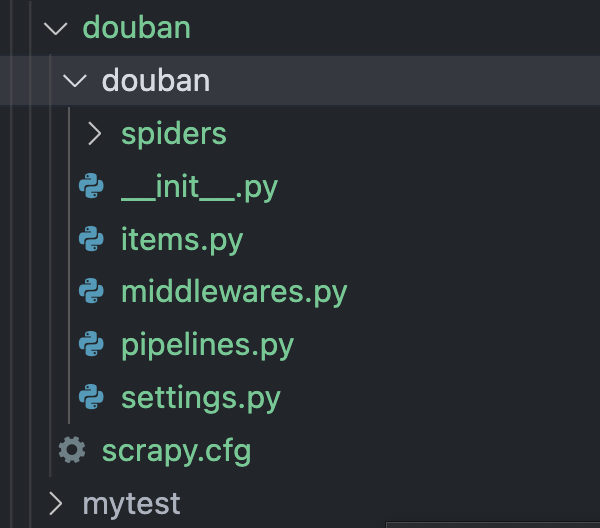

在`spiders`目录下新建py文件`douban_spider.py`

```python
from scrapy.spiders import Spider
from douban.items import DoubanMovie250Item

class DoubanMovieTop250Spider(Spider):
    name = 'douban_movie_top250'
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/53.0.2785.143 Safari/537.36',
    }

    def start_requests(self):
        url = 'https://movie.douban.com/top250'
        yield Request(url, headers=self.headers)

    def parse(self, response):
        item = DoubanMovie250Item()
        movies = response.xpath('//ol[@class="grid_view"]/li')
        for movie in movies:
            item['ranking'] = movie.xpath(
                './/div[@class="pic"]/em/text()').extract()[0]
            item['name'] = movie.xpath(
                './/div[@class="hd"]/a/span[1]/text()').extract()[0]
            item['star'] = movie.xpath(
                './/div[@class="star"]/span/text()'
            ).extract()[0]
            item['score'] = movie.xpath(
                './/div[@class="star"]/span[@class="rating_num"]/text()'
            ).extract()[0]
            item['score_num'] = movie.xpath(
                './/div[@class="star"]/span/text()').re(r'(\d+)人评价')[0]
            item['quote'] = movie.xpath(
                './/p[@class="quote]/span/text()'
            ).extract()[0]
            yield item
```


3. **定义Item：** 创建一个Item类来定义要从网页中提取的数据字段和结构。

打开`douban/douban/items.py`，定义`DoubanMovie250Item`类。

```python
import scrapy
class DoubanMovie250Item(scrapy.Item):
    # define the fields for your item here like:
    # ranking
    ranking = scrapy.Field()
    star = scrapy.Field()
    score = scrapy.Field()
    name = scrapy.Field()
    score_num = scrapy.Field()
    quote = scrapy.Field()
    pass
```


在douban目录下运行`scrapy crawl douban_movie_top250 -o douban.csv`

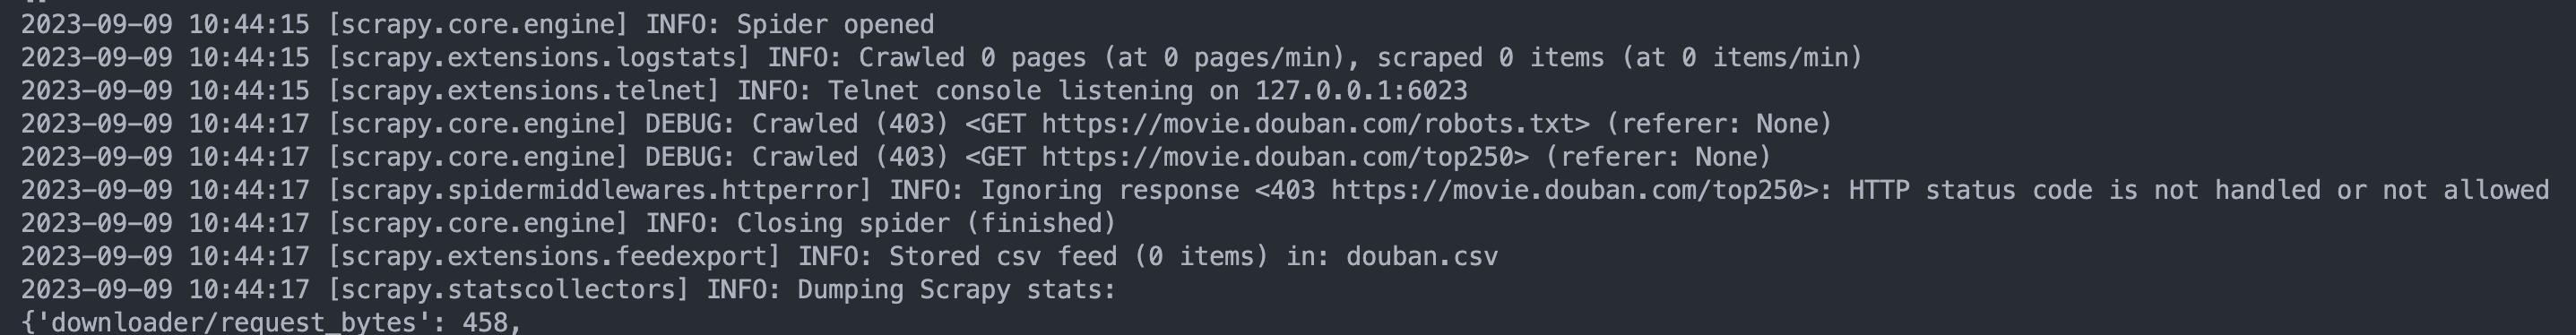
4. **编写Pipeline：** 根据需要编写自定义的Pipeline来处理爬取到的数据。您可以配置多个Pipeline按顺序处理数据。

5. **设置爬虫参数：** 在项目设置中配置爬虫参数，如User-Agent、代理、下载延迟等。

6. **运行爬虫：** 使用Scrapy命令行工具运行您的Spider。Scrapy将自动执行爬取、数据提取和数据处理的任务。

7. **存储数据：** 根据您的需求，将爬取到的数据存储到数据库、JSON文件、CSV文件等目标存储中。

**示例代码：**

下面是一个简单的Scrapy Spider示例，用于爬取特定网站上的文章标题和链接：

```python
import scrapy

class MySpider(scrapy.Spider):
    name = 'myspider'
    start_urls = ['https://example.com']

    def parse(self, response):
        for article in response.css('div.article'):
            title = article.css('h2::text').get()
            link = article.css('a::attr(href)').get()
            yield {
                'title': title,
                'link': link
            }
        next_page = response.css('a.next-page::attr(href)').get()
        if next_page:
            yield response.follow(next_page, self.parse)
```

这个Spider定义了起始URL和如何提取文章标题和链接的规则。它将数据以字典形式返回，并自动跟踪下一页。

通过Scrapy，您可以构建更复杂的爬虫，处理更多的网站和数据，配置更多的爬取和数据处理选项。要深入了解Scrapy，请查阅Scrapy的官方文档：https://docs.scrapy.org/。

## 反爬虫技术

https://juejin.cn/post/7145268210126815239

反爬虫相关技术
在了解具体的反爬虫措施之前，我们先介绍下反爬虫的定义和意义，限制爬虫程序访问服务器资源和获取数据的行为称为反爬虫。爬虫程序的访问速率和目的与正常用户的访问速率和目的是不同的，大部分爬虫会无节制地对目标应用进行爬取，这给目标应用的服务器带来巨大的压力。爬虫程序发出的网络请求被运营者称为“垃圾流量”。开发者为了保证服务器的正常运转或降低服务器的压力与运营成本，不得不使出各种各样的技术手段来限制爬虫对服务器资源的访问。
所以为什么要做反爬虫，答案是显然的，爬虫流量会提升服务器的负载，过大的爬虫流量会影响到服务的正常运转，从而造成收入损失，另一方面，一些核心数据的外泄，会使数据拥有者失去竞争力。
常见的反爬虫手段，如图7所示。主要包含文本混淆、页面动态渲染、验证码校验、请求签名校验、大数据风控、js混淆和蜜罐等，其中文本混淆包含css偏移、图片伪装文本、自定义字体等，而风控策略的制定则往往是从参数校验、行为频率和模式异常等方面出发的。

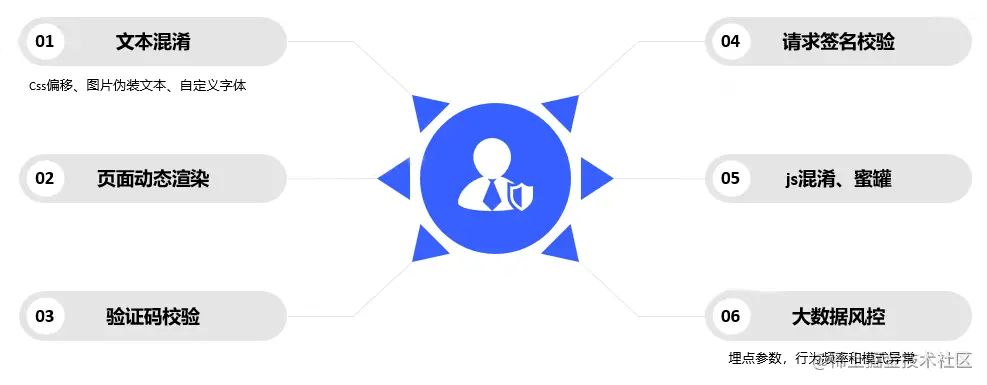